In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("merged_data.csv")

data = data.drop(columns=['Rate'])
data = data.drop(columns=['Count_crimes'])

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['IsWeekend'] = data['Date'].dt.weekday >= 5

data['Month_Sin'] = np.sin(2 * np.pi * data['Month']/12)
data['Month_Cos'] = np.cos(2 * np.pi * data['Month']/12)
data['Day_Sin'] = np.sin(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)
data['Day_Cos'] = np.cos(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)

numeric_columns = data.select_dtypes(include=['float', 'int']).columns

for column in numeric_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)


data['Date'] =data['Year'] + (data['Month'] - 0.5)/12

X = data.drop(columns=['Violent_crime'])
y = data['Violent_crime']

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [4]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'WCSS')

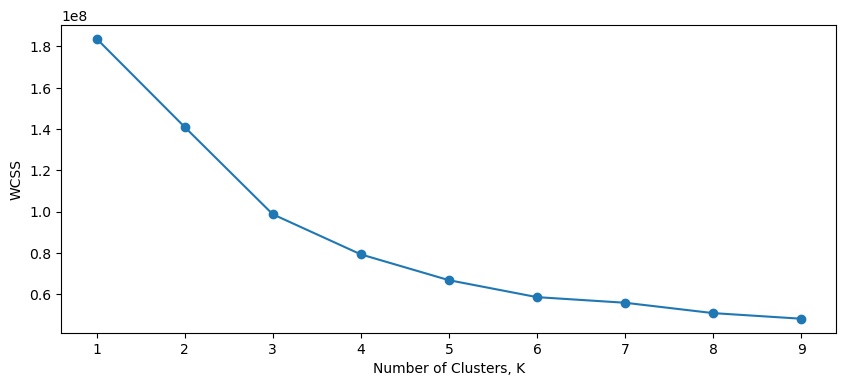

In [5]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(inertias))+1,inertias,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [7]:
hc = AgglomerativeClustering(distance_threshold=None, n_clusters=3)

In [8]:
hc.fit(X)

AgglomerativeClustering(n_clusters=3)

In [9]:
linkage_methods = ['single', 'complete', 'average', 'ward']

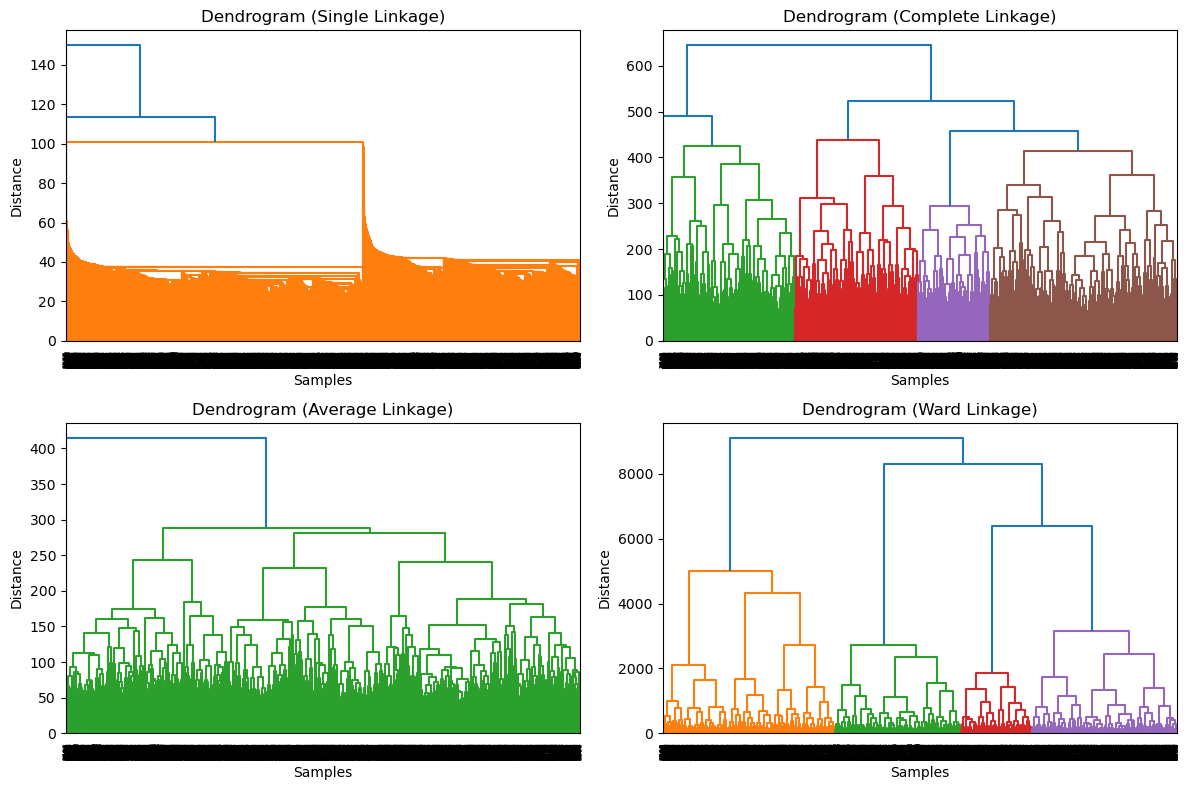

In [10]:
plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

In [11]:
plot_df = pd.DataFrame(X)
plot_df['clusters'] = y_kmeans

In [12]:
sns.pairplot(plot_df, hue='clusters', palette='Dark2')

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method